# Obtenir des statistiques sur les passagers du Tinatic
    A partir des fichiers "passengers.csv" et "survival.csv" creer 2 dataframes 'df_passagers' et 'df_survie'

In [19]:
import pandas as pd

In [20]:
file_passenger = 'Data/Titanic/passengers.csv'
file_survivals = 'Data/Titanic/survival.csv'

In [21]:
# Charger le fichier "passengers.csv" dans un DataFrame
df_passengers = pd.read_csv(file_passenger)
df_passengers


,PassengerId,Pclass,Name,Sex,Age,Fare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,3,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,5,3,"Allen, Mr. William Henry",male,35.0,8.0500
...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,8.0500
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,108.9000
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,7.2500
1307,1308,3,"Ware, Mr. Frederick",male,NaN,8.0500


In [22]:
df_survivals = pd.read_csv(file_survivals)
df_survivals

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [23]:
# Joindre les deux DataFrames à partir de la colonne "PassengerId" qui contiendra toutes les données
df_merge = pd.merge(df_passengers, df_survivals, on='PassengerId')
df_merge

,PassengerId,Pclass,Name,Sex,Age,Fare,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1
4,5,3,"Allen, Mr. William Henry",male,35.0,8.0500,0
...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,8.0500,0
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,108.9000,1
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,7.2500,0
1307,1308,3,"Ware, Mr. Frederick",male,NaN,8.0500,0


In [24]:
# Compter le nombre de passagers dans df_merge
nb_passagers = df_merge.shape[0]
nb_passagers

1309

In [25]:
# Type des colonnes de df_merge
print(df_merge.dtypes)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
Fare           float64
Survived         int64
dtype: object


In [26]:
# Calculer la moyenne du prix du billet
moyenne_prix_billet = df_merge['Fare'].mean()
round(moyenne_prix_billet,1)

33.3

In [27]:
# Trouver le prix du billet le plus cher
prix_billet_max = df_merge['Fare'].max()
prix_billet_max

512.3292

In [28]:
# Afficher les informations des passagers ayant payé le prix du billet le plus cher
df_prix_billet_max = df_merge[df_merge['Fare'] == prix_billet_max]
df_prix_billet_max

,PassengerId,Pclass,Name,Sex,Age,Fare,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,512.3292,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,512.3292,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,512.3292,1
1234,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,512.3292,1


In [29]:
# Afficher les informations des passagers qui ne sont pas en première classe : Pclass différent de 1
df_pas_premiere_classe = df_merge[df_merge['Pclass'] != 1]
df_pas_premiere_classe

,PassengerId,Pclass,Name,Sex,Age,Fare,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,1
4,5,3,"Allen, Mr. William Henry",male,35.0,8.0500,0
5,6,3,"Moran, Mr. James",male,NaN,8.4583,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,0
...,...,...,...,...,...,...,...
1303,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,7.7750,1
1304,1305,3,"Spector, Mr. Woolf",male,NaN,8.0500,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,7.2500,0
1307,1308,3,"Ware, Mr. Frederick",male,NaN,8.0500,0


In [30]:
# Prix de la 1er classe la moins chère hors Fare = 0
df_premiere_classe = df_merge[(df_merge['Pclass'] == 1) & (
    df_merge['Fare'] != 0)]
prix_premiere_classe_min = df_premiere_classe['Fare'].min()
prix_premiere_classe_min



5.0

In [31]:
# Afficher les informations des passagers qui sont en première classe dans l'ordre croissant du prix du billet
df_premiere_classe = df_merge[df_merge['Pclass'] == 1].sort_values(by='Fare')
df_premiere_classe

,PassengerId,Pclass,Name,Sex,Age,Fare,Survived
822,823,1,"Reuchlin, Jonkheer. John George",male,38.0,0.0000,0
815,816,1,"Fry, Mr. Richard",male,NaN,0.0000,0
263,264,1,"Harrison, Mr. William",male,40.0,0.0000,0
1157,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0.0000,0
633,634,1,"Parr, Mr. William Henry Marsh",male,NaN,0.0000,0
...,...,...,...,...,...,...,...
341,342,1,"Fortune, Miss. Alice Elizabeth",female,24.0,263.0000,1
258,259,1,"Ward, Miss. Anna",female,35.0,512.3292,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,512.3292,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,512.3292,1


In [32]:
# Afficher les informations des passagers qui ont payé le prix du billet le moins cher en première classe
df_prix_billet_min = df_merge[(df_merge['Pclass'] == 1) & (df_merge['Fare'] == prix_premiere_classe_min)].sort_values(by='Fare')
df_prix_billet_min

,PassengerId,Pclass,Name,Sex,Age,Fare,Survived
872,873,1,"Carlsson, Mr. Frans Olof",male,33.0,5.0,0


In [33]:
# Afficher l'age de la personne la plus jeune
personne_plus_jeune = df_merge['Age'].min()
personne_plus_jeune

0.17

In [34]:
# Afficher les informations de la personne la plus jeune
df_personne_plus_jeune = df_merge[df_merge['Age'] == personne_plus_jeune]
df_personne_plus_jeune

,PassengerId,Pclass,Name,Sex,Age,Fare,Survived
1245,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,20.575,1


In [35]:
# Afficher l'age de la personne la plus agée
personne_plus_agee = df_merge['Age'].max()
personne_plus_agee

80.0

In [36]:
# Afficher les informations de la personne la plus agée
df_personne_plus_agee = df_merge[df_merge['Age'] == personne_plus_agee]
df_personne_plus_agee

,PassengerId,Pclass,Name,Sex,Age,Fare,Survived
630,631,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,30.0,1


In [44]:
# Afficher le prix médian des billets de chaque classe arrondi à 2 chiffres après la virgule
prix_median = df_merge.groupby('Pclass')['Fare'].median().round(1).reset_index()
prix_median

,Pclass,Fare
0,1,60.0
1,2,15.0
2,3,8.0


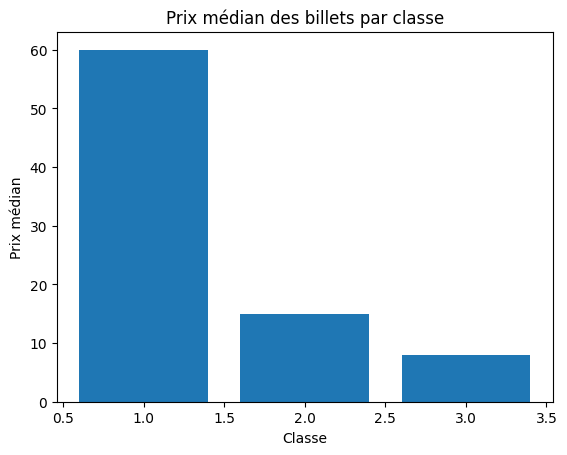

In [45]:
# afficher l'histogramme des prix_median
import matplotlib.pyplot as plt
plt.bar(prix_median['Pclass'], prix_median['Fare'])
plt.xlabel('Classe')
plt.ylabel('Prix médian')
plt.title('Prix médian des billets par classe')
plt.show()


In [38]:
# Convertir Sex en colonne numérique : 0 = male / 1 = female
df_merge['Sex_binaire'] = df_merge['Sex'].map({'male': 0, 'female': 1})
df_merge

# Calculer le nombre de femmes : Sex = female
nb_femmes = df_merge[df_merge['Sex'] == 'female'].shape[0]
nb_femmes
                     
# Calcule le pourcentage de femmes : Sex_binaire = 1 / nombre total de passagers
pourcentage_femmes = nb_femmes / nb_passagers
pourcentage_femmes

0.3559969442322384

In [39]:
# Calcule de la proportion de survivants
proportion_survivants = df_merge['Survived'].mean()
proportion_survivants

0.37738731856378915

In [40]:
# Calcule le total de survivants
total_survivants = df_merge['Survived'].sum()
display(total_survivants)

# Calcule proportion_survivants_classe = nombre de survivants par classe / nombre total de survivants arrondi à 2 chiffres
proportion_survivants_classe = df_merge.groupby('Pclass')['Survived'].sum() / total_survivants
proportion_survivants_classe = round(proportion_survivants_classe, 4)
proportion_survivants_classe



494

Pclass
1    0.3765
2    0.2368
3    0.3866
Name: Survived, dtype: float64

<Axes: ylabel='Survived'>

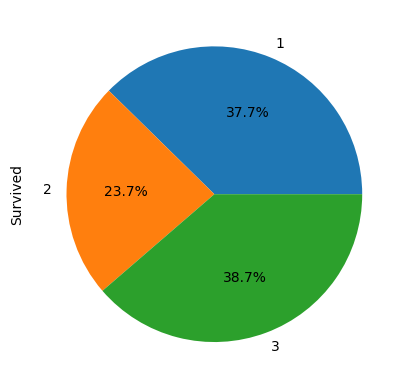

In [41]:
# génère un graphique circulaire de la proportion de survivants par classe
proportion_survivants_classe.plot.pie(autopct='%1.1f%%')
